### Prepare a classification model using SVM for salary data

#### Importing Libearies 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import warnings 
import sklearn 
from matplotlib import pyplot 
%matplotlib inline

### Import Traning Dataset 

In [2]:
income_df = pd.read_csv("F://Data_Set/SalaryData_Train(1).csv") 
income_df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
income_df.shape 

(30161, 14)

In [4]:
income_df.describe() 

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


#### Data Cleaning

In [5]:
income_df.isnull().sum() 

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [9]:
income_df.age = income_df.age.astype(float)
income_df['hoursperweek'] = income_df['hoursperweek'].astype(float) 

In [10]:
my_df = income_df.dropna() 

#### Feature Engineering 

unique element of Workclass Column

In [56]:
print('workclass = ',my_df.workclass.unique()) 

workclass =  [5 4 2 0 1 3 6]


Unique elements of Education Column

In [12]:
print('education = ',my_df.education.unique()) 

education [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th']


Unique elements of maritalstatus Column 

In [13]:
print('maritalstatus = ',my_df['maritalstatus'].unique()) 

maritalstatus [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']


Unique Elements of Occupation Column

In [14]:
print('occupation = ',my_df.occupation.unique()) 

occupation [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Transport-moving' ' Farming-fishing'
 ' Machine-op-inspct' ' Tech-support' ' Craft-repair' ' Protective-serv'
 ' Armed-Forces' ' Priv-house-serv']


Unique element of relationship Column 

In [15]:
print('relationship = ',my_df.relationship.unique()) 

relationship [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']


Unique element of race Column 

In [16]:
print('race = ',my_df.race.unique())

race [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']


Unique element of Sex Column 

In [17]:
print('sex = ',my_df.sex.unique())   

sex [' Male' ' Female']


Unique element of Native Column 

In [18]:
print('native = ',my_df['native'].unique())

native [' United-States' ' Cuba' ' Jamaica' ' India' ' Mexico' ' Puerto-Rico'
 ' Honduras' ' England' ' Canada' ' Germany' ' Iran' ' Philippines'
 ' Poland' ' Columbia' ' Cambodia' ' Thailand' ' Ecuador' ' Laos'
 ' Taiwan' ' Haiti' ' Portugal' ' Dominican-Republic' ' El-Salvador'
 ' France' ' Guatemala' ' Italy' ' China' ' South' ' Japan' ' Yugoslavia'
 ' Peru' ' Outlying-US(Guam-USVI-etc)' ' Scotland' ' Trinadad&Tobago'
 ' Greece' ' Nicaragua' ' Vietnam' ' Hong' ' Ireland' ' Hungary']


Unique elements of Salary Column 

In [19]:
print('Salary = ',my_df.Salary.unique()) 

Salary [' <=50K' ' >50K']


In [24]:
#my_df.loc[income_df['predclass'] == ' >50K', 'predclass'] = 1
#my_df.loc[income_df['predclass'] == ' <=50K', 'predclass'] = 0

In [25]:
#predclass1 = my_df[my_df['predclass'] == 1]
#predclass0 = my_df[my_df['predclass'] == 0]

Visualization of Salary Column 

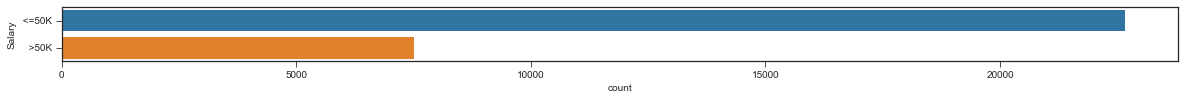

In [20]:
fig = plt.figure(figsize=(20,1))
plt.style.use('seaborn-ticks')
sns.countplot(y="Salary", data=my_df) 

#### Education 

In [21]:
my_df['education'].replace('Preschool', 'dropout',inplace=True)
my_df['education'].replace('10th', 'dropout',inplace=True)
my_df['education'].replace('11th', 'dropout',inplace=True)
my_df['education'].replace('12th', 'dropout',inplace=True)
my_df['education'].replace('1st-4th', 'dropout',inplace=True)
my_df['education'].replace('5th-6th', 'dropout',inplace=True)
my_df['education'].replace('7th-8th', 'dropout',inplace=True)
my_df['education'].replace('9th', 'dropout',inplace=True)
my_df['education'].replace('HS-Grad', 'HighGrad',inplace=True)
my_df['education'].replace('HS-grad', 'HighGrad',inplace=True)
my_df['education'].replace('Some-college', 'CommunityCollege',inplace=True)
my_df['education'].replace('Assoc-acdm', 'CommunityCollege',inplace=True)
my_df['education'].replace('Assoc-voc', 'CommunityCollege',inplace=True)
my_df['education'].replace('Bachelors', 'Bachelors',inplace=True)
my_df['education'].replace('Masters', 'Masters',inplace=True)
my_df['education'].replace('Prof-school', 'Masters',inplace=True)
my_df['education'].replace('Doctorate', 'Doctorate',inplace=True)

In [22]:
my_df[['education', 'educationno']].groupby(['education'],
    as_index=False).mean().sort_values(by='educationno', ascending=False)  

,education,educationno
10,Doctorate,16
14,Prof-school,15
12,Masters,14
9,Bachelors,13
7,Assoc-acdm,12
8,Assoc-voc,11
15,Some-college,10
11,HS-grad,9
2,12th,8
1,11th,7


Visualization of Education Column 

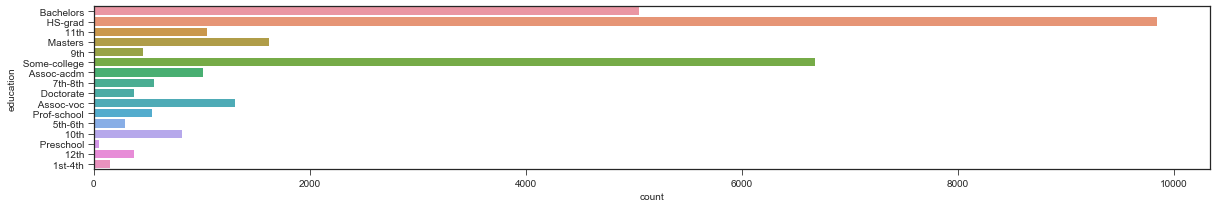

In [23]:
fig = plt.figure(figsize=(20,3))
plt.style.use('seaborn-ticks')
sns.countplot(y="education", data=my_df) 

In [24]:
my_df['maritalstatus'].replace('Never-married', 'NotMarried',inplace=True)
my_df['maritalstatus'].replace(['Married-AF-spouse'], 'Married',inplace=True)
my_df['maritalstatus'].replace(['Married-civ-spouse'], 'Married',inplace=True)
my_df['maritalstatus'].replace(['Married-spouse-absent'], 'NotMarried',inplace=True)
my_df['maritalstatus'].replace(['Separated'], 'Separated',inplace=True)
my_df['maritalstatus'].replace(['Divorced'], 'Separated',inplace=True)
my_df['maritalstatus'].replace(['Widowed'], 'Widowed',inplace=True) 

Visualization of maritalstatus Column 

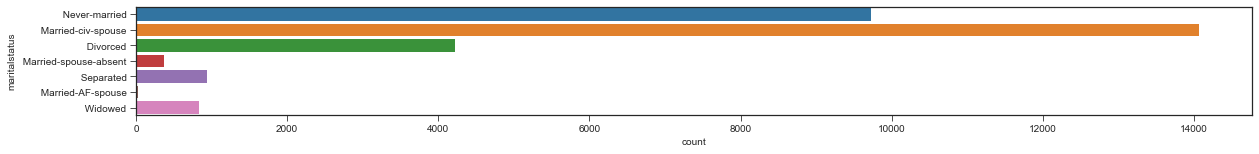

In [25]:
fig = plt.figure(figsize=(20,2))
plt.style.use('seaborn-ticks')
sns.countplot(y="maritalstatus", data=my_df) 

Visualization of Occupation Column  

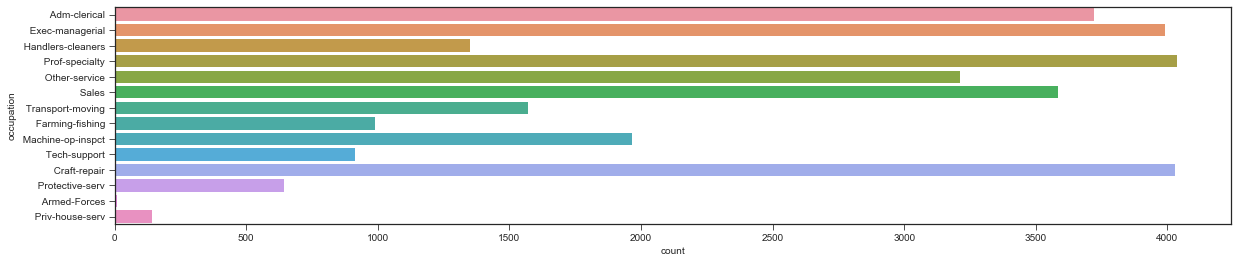

In [26]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,4)) 
sns.countplot(y="occupation", data=my_df) 

Visualization of workclass Column 

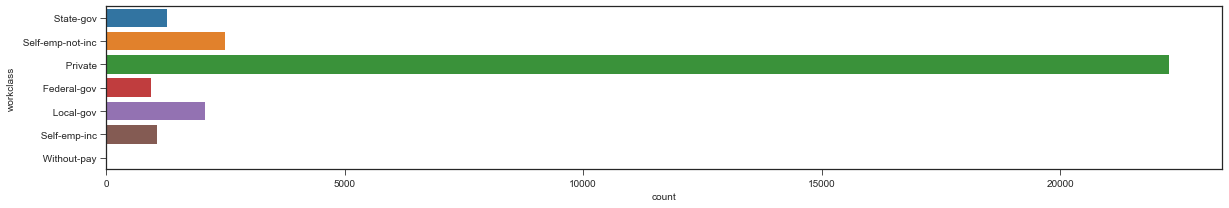

In [27]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,3)) 
sns.countplot(y="workclass", data=my_df) 

make the age variable discretized

In [28]:
my_df['age_bin'] = pd.cut(my_df['age'], 20) 

C:\Users\Nakul Raje\anaconda3\lib\site-packages\seaborn\distributions.py:200: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\Nakul Raje\anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Nakul Raje\anaconda3\lib\site-packages\numpy\lib\histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
C:\Users\Nakul Raje\anaconda3\lib\site-packages\seaborn\distributions.py:200: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\Nakul Raje\anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Nakul Raje\anaconda3\lib\site-packages\numpy\lib\histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


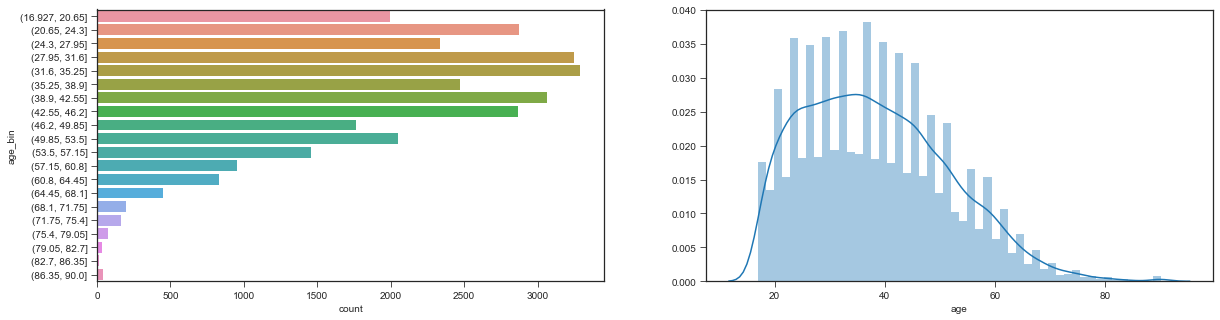

In [29]:
plt.style.use('seaborn-ticks')
fig = plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 1)
sns.countplot(y="age_bin", data=my_df)
plt.subplot(1, 2, 2)
sns.distplot(my_df['age']); 
sns.distplot(my_df[my_df['Salary'] == '>50K']['age'], kde_kws={"label": ">$50K"})
sns.distplot(my_df[my_df['Salary'] == '<=50K']['age'], kde_kws={"label": "<=$50K"}) 

In [30]:
my_df[['Salary', 'age']].groupby(['Salary'],
                                    as_index=False).mean().sort_values(by='age', ascending=False)

,Salary,age
1,>50K,43.959110
0,<=50K,36.608264


Visualizing the Race Column 

<Figure size 1440x360 with 0 Axes>

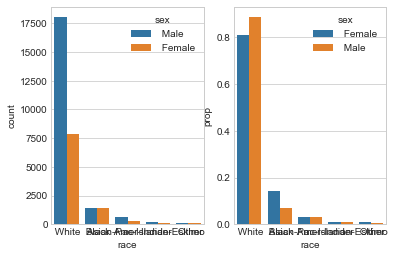

In [31]:
plt.style.use('seaborn-whitegrid')
x, y, hue = "race", "prop", "sex" 
#hue_order = ["Male", "Female"]
plt.figure(figsize=(20,5)) 
f, axes = plt.subplots(1, 2)
sns.countplot(x=x, hue=hue, data=my_df, ax=axes[0])

prop_df = (my_df[x]
           .groupby(my_df[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df, ax=axes[1]) 

Visualization of Hours of Work Column

In [32]:
# Let's use the Pandas Cut function to bin the data in equally sized buckets
my_df['hoursperweek_bin'] = pd.cut(my_df['hoursperweek'], 10)
my_df['hoursperweek'] = my_df['hoursperweek'] 

C:\Users\Nakul Raje\anaconda3\lib\site-packages\seaborn\distributions.py:200: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\Nakul Raje\anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Nakul Raje\anaconda3\lib\site-packages\numpy\lib\histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
C:\Users\Nakul Raje\anaconda3\lib\site-packages\seaborn\distributions.py:200: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\Nakul Raje\anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Nakul Raje\anaconda3\lib\site-packages\numpy\lib\histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


(20, 60)

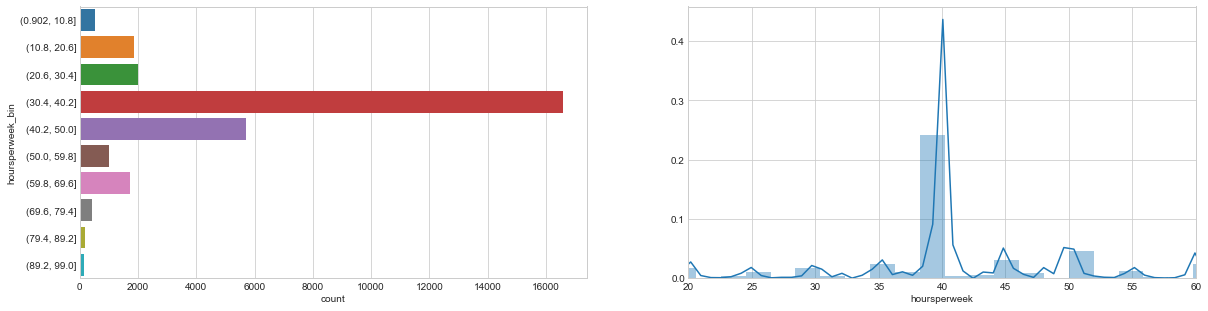

In [33]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 1)
sns.countplot(y="hoursperweek_bin", data=my_df);
plt.subplot(1, 2, 2)
sns.distplot(my_df['hoursperweek']);
sns.distplot(my_df[my_df['Salary'] == '>50K']['hoursperweek'], kde_kws={"label": ">$50K"})
sns.distplot(my_df[my_df['Salary'] == '<=50K']['hoursperweek'], kde_kws={"label": "<$50K"})
plt.ylim(0, None)
plt.xlim(20, 60) 

Create a crossing feature: Age + hour of work

C:\Users\Nakul Raje\anaconda3\lib\site-packages\seaborn\axisgrid.py:2272: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


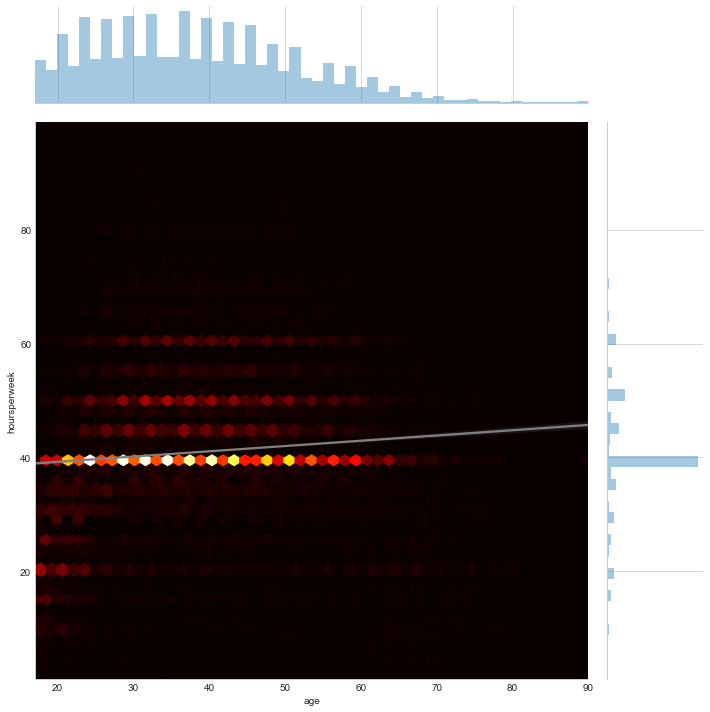

In [34]:
g = sns.jointplot(x = 'age', 
              y = 'hoursperweek',
              data = my_df, 
              kind = 'hex', 
              cmap= 'hot', 
              size=10) 
sns.regplot(my_df.age, my_df['hoursperweek'], ax=g.ax_joint, scatter=False, color='grey') 

In [36]:
my_df.head() 

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary,age_bin,hoursperweek_bin
0,39.0,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40.0,United-States,<=50K,"(38.9, 42.55]","(30.4, 40.2]"
1,50.0,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13.0,United-States,<=50K,"(49.85, 53.5]","(10.8, 20.6]"
2,38.0,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,<=50K,"(35.25, 38.9]","(30.4, 40.2]"
3,53.0,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,<=50K,"(49.85, 53.5]","(30.4, 40.2]"
4,28.0,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K,"(27.95, 31.6]","(30.4, 40.2]"


In [37]:
# Crossing Numerical Features
my_df['age-hours'] = my_df['age']*my_df['hoursperweek']
my_df['age-hours_bin'] = pd.cut(my_df['age-hours'], 10) 

C:\Users\Nakul Raje\anaconda3\lib\site-packages\seaborn\distributions.py:200: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\Nakul Raje\anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Nakul Raje\anaconda3\lib\site-packages\numpy\lib\histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
C:\Users\Nakul Raje\anaconda3\lib\site-packages\seaborn\distributions.py:200: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\Nakul Raje\anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Nakul Raje\anaconda3\lib\site-packages\numpy\lib\histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


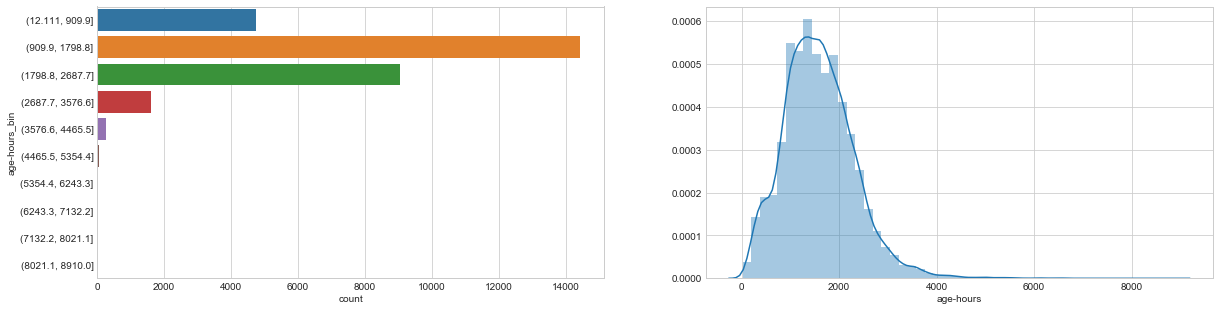

In [38]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 1)
sns.countplot(y="age-hours_bin", data=my_df);
plt.subplot(1, 2, 2)
sns.distplot(my_df['age-hours']); 
sns.distplot(my_df[my_df['Salary'] == '>50K']['age-hours'], kde_kws={"label": ">$50K"})
sns.distplot(my_df[my_df['Salary'] == '<=50K']['age-hours'], kde_kws={"label": "<$50K"})  

#### Correlation Heatmap

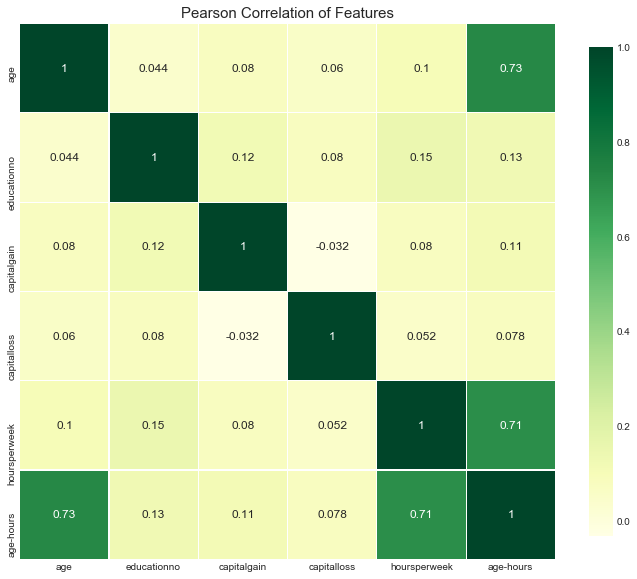

In [39]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(12, 10)) 
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = "YlGn",
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(my_df)

#### Bivariate Analysis 

In [40]:
my_df.tail() 

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary,age_bin,hoursperweek_bin,age-hours,age-hours_bin
30156,27.0,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38.0,United-States,<=50K,"(24.3, 27.95]","(30.4, 40.2]",1026.0,"(909.9, 1798.8]"
30157,40.0,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40.0,United-States,>50K,"(38.9, 42.55]","(30.4, 40.2]",1600.0,"(909.9, 1798.8]"
30158,58.0,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40.0,United-States,<=50K,"(57.15, 60.8]","(30.4, 40.2]",2320.0,"(1798.8, 2687.7]"
30159,22.0,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20.0,United-States,<=50K,"(20.65, 24.3]","(10.8, 20.6]",440.0,"(12.111, 909.9]"
30160,52.0,Self-emp-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40.0,United-States,>50K,"(49.85, 53.5]","(30.4, 40.2]",2080.0,"(1798.8, 2687.7]"


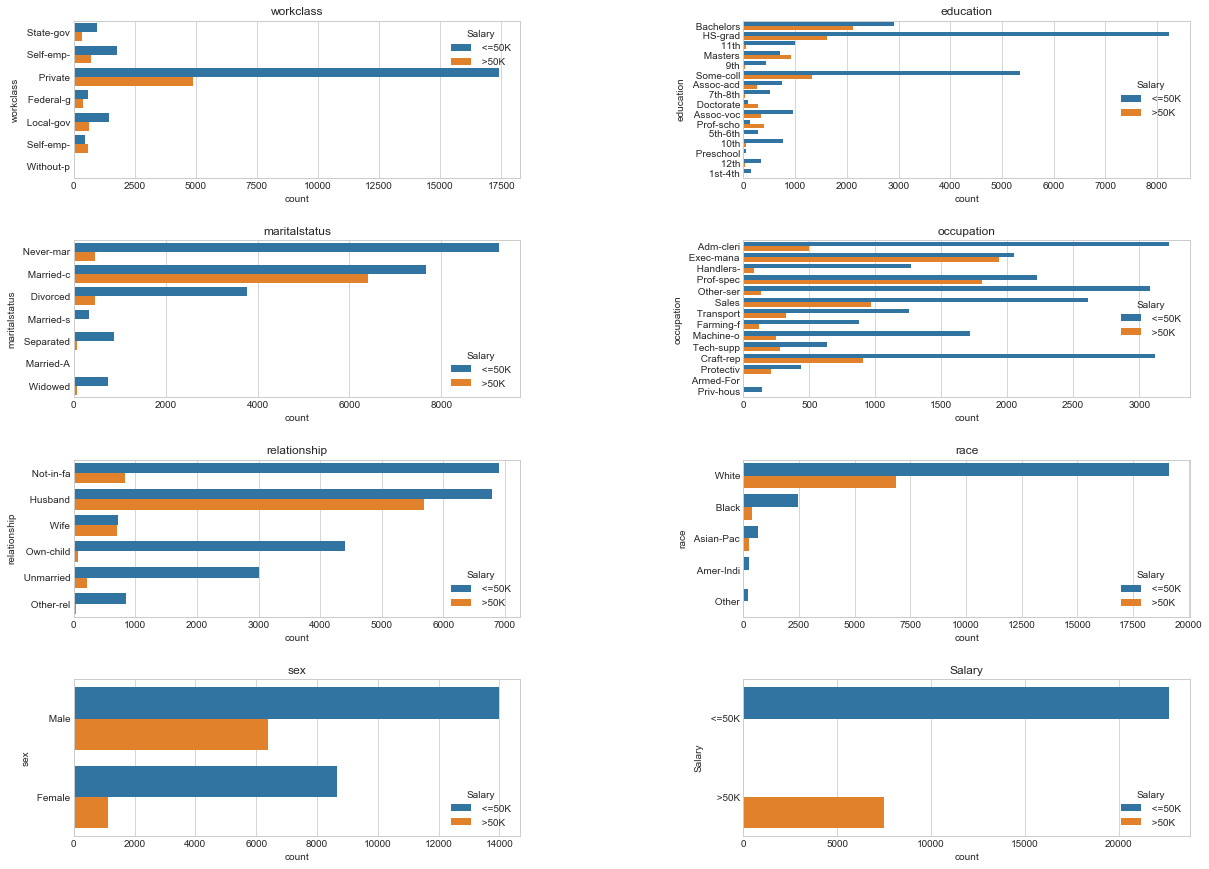

In [41]:
def plot_bivariate_bar(dataset, hue, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    dataset = dataset.select_dtypes(include=[np.object])
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, hue=hue, data=dataset)
            substrings = [s.get_text()[:10] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            
bivariate_df = my_df.loc[:, ['workclass', 'education', 
           'maritalstatus', 'occupation', 
           'relationship', 'race', 'sex','Salary']]  

plot_bivariate_bar(bivariate_df, hue='Salary', cols=2, width=20, height=15, hspace=0.4, wspace=0.5)

#### Occupation vs.Salary

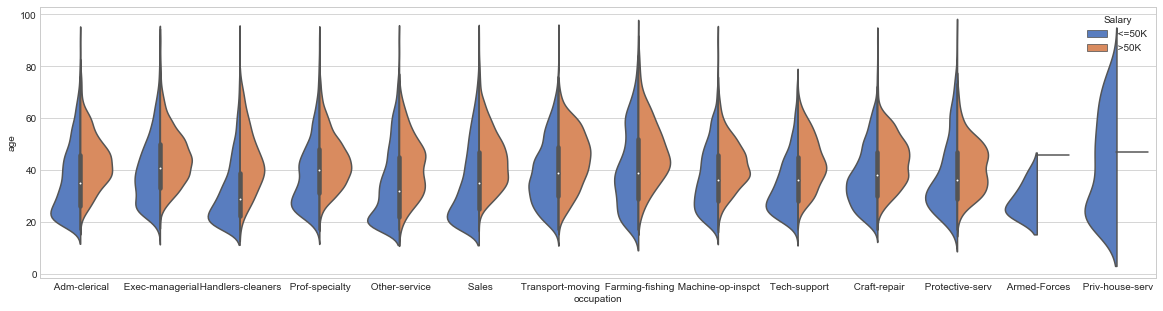

In [42]:
a4_dims = (20, 5)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.violinplot(x="occupation", y="age", hue="Salary",
                    data=my_df, gridsize=100, palette="muted", split=True, saturation=0.75)
ax

#### Race vs. Salary

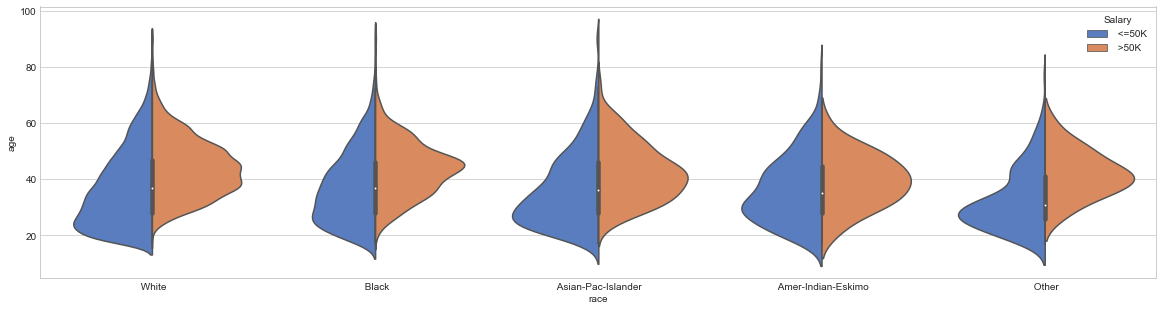

In [43]:
a4_dims = (20, 5)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.violinplot(x="race", y="age", hue="Salary",
                    data=my_df, gridsize=100, palette="muted", split=True, saturation=0.75)
ax 

#### Building Machine Learning Models

In [44]:
from sklearn.cluster import KMeans
from matplotlib import cm
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score

from sklearn.decomposition import PCA
from pandas.plotting import scatter_matrix
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import GridSearchCV 

#importing all the required ML packages
#from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
#from sklearn.ensemble import RandomForestClassifier #Random Forest
#from sklearn.neighbors import KNeighborsClassifier #KNN
#from sklearn.naive_bayes import GaussianNB #Naive bayes
#from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix 

#### Feature Encoding 

In [45]:
# Feature Selection and Encoding
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
#from sklearn.model_selection import train_test_split #training and testing data split 

In [46]:
my_df = my_df.apply(LabelEncoder().fit_transform)
my_df.head() 

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary,age_bin,hoursperweek_bin,age-hours,age-hours_bin
0,22,5,9,12,4,0,1,4,1,24,0,39,37,0,6,3,589,1
1,33,4,9,12,2,3,0,4,1,0,0,12,37,0,9,1,257,0
2,21,2,11,8,0,5,1,4,1,0,0,39,37,0,5,3,578,1
3,36,2,1,6,2,5,0,2,1,0,0,39,37,0,9,3,766,2
4,11,2,9,12,2,9,5,2,0,0,0,39,4,0,3,3,437,1


#### Divide the Dataset in Dependent and Independent Variable 

In [47]:
drop_elements = ['education', 'native', 'Salary', 'age_bin', 
                 'age-hours_bin']
y = my_df["Salary"]
X = my_df.drop(drop_elements, axis=1)
X.head() 

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,hoursperweek_bin,age-hours
0,22,5,12,4,0,1,4,1,24,0,39,3,589
1,33,4,12,2,3,0,4,1,0,0,12,1,257
2,21,2,8,0,5,1,4,1,0,0,39,3,578
3,36,2,6,2,5,0,2,1,0,0,39,3,766
4,11,2,12,2,9,5,2,0,0,0,39,3,437


#### Applay SVM Classifiation algorithm

In [48]:
from sklearn.svm import SVC 

In [49]:
classifier = SVC(kernel='linear', random_state=0)  

****** Traning our Model ******

In [50]:
classifier.fit(X,y)  

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

### Import Testing Dataset 

In [51]:
test_data = pd.read_csv('F://Data_Set/SalaryData_Test(1).csv') 

In [52]:
test_data.head() 

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


Check Test Dataset Information 

In [55]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


Check any Null Value Present in the Test Dataset or Not 

In [53]:
test_data.isnull().sum() 

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

Check Description of the Teasting Dataset 

In [54]:
test_data.describe() 

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [57]:
test_dataset = test_data.copy() 

#### Education 

In [58]:
test_dataset['education'].replace('Preschool', 'dropout',inplace=True)
test_dataset['education'].replace('10th', 'dropout',inplace=True)
test_dataset['education'].replace('11th', 'dropout',inplace=True)
test_dataset['education'].replace('12th', 'dropout',inplace=True)
test_dataset['education'].replace('1st-4th', 'dropout',inplace=True)
test_dataset['education'].replace('5th-6th', 'dropout',inplace=True)
test_dataset['education'].replace('7th-8th', 'dropout',inplace=True)
test_dataset['education'].replace('9th', 'dropout',inplace=True)
test_dataset['education'].replace('HS-Grad', 'HighGrad',inplace=True)
test_dataset['education'].replace('HS-grad', 'HighGrad',inplace=True)
test_dataset['education'].replace('Some-college', 'CommunityCollege',inplace=True)
test_dataset['education'].replace('Assoc-acdm', 'CommunityCollege',inplace=True)
test_dataset['education'].replace('Assoc-voc', 'CommunityCollege',inplace=True)
test_dataset['education'].replace('Bachelors', 'Bachelors',inplace=True)
test_dataset['education'].replace('Masters', 'Masters',inplace=True)
test_dataset['education'].replace('Prof-school', 'Masters',inplace=True)
test_dataset['education'].replace('Doctorate', 'Doctorate',inplace=True)

In [59]:
test_dataset[['education', 'educationno']].groupby(['education'],
    as_index=False).mean().sort_values(by='educationno', ascending=False) 

,education,educationno
10,Doctorate,16
14,Prof-school,15
12,Masters,14
9,Bachelors,13
7,Assoc-acdm,12
8,Assoc-voc,11
15,Some-college,10
11,HS-grad,9
2,12th,8
1,11th,7


In [62]:
test_dataset['maritalstatus'].replace('Never-married', 'NotMarried',inplace=True)
test_dataset['maritalstatus'].replace(['Married-AF-spouse'], 'Married',inplace=True)
test_dataset['maritalstatus'].replace(['Married-civ-spouse'], 'Married',inplace=True)
test_dataset['maritalstatus'].replace(['Married-spouse-absent'], 'NotMarried',inplace=True)
test_dataset['maritalstatus'].replace(['Separated'], 'Separated',inplace=True)
test_dataset['maritalstatus'].replace(['Divorced'], 'Separated',inplace=True)
test_dataset['maritalstatus'].replace(['Widowed'], 'Widowed',inplace=True) 

make the age variable discretized 

In [63]:
test_dataset['age_bin'] = pd.cut(test_dataset['age'], 20) 

In [65]:
test_dataset[['Salary', 'age']].groupby(['Salary'],
                                    as_index=False).mean().sort_values(by='age', ascending=False)

,Salary,age
1,>50K,44.101351
0,<=50K,37.031338


In [66]:
# Let's use the Pandas Cut function to bin the data in equally sized buckets
test_dataset['hoursperweek_bin'] = pd.cut(test_dataset['hoursperweek'], 10)
test_dataset['hoursperweek'] = test_dataset['hoursperweek'] 

In [67]:
test_dataset.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary,age_bin,hoursperweek_bin
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,"(24.3, 27.95]","(30.4, 40.2]"
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,"(35.25, 38.9]","(40.2, 50.0]"
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,"(27.95, 31.6]","(30.4, 40.2]"
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,"(42.55, 46.2]","(30.4, 40.2]"
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K,"(31.6, 35.25]","(20.6, 30.4]"


In [68]:
# Crossing Numerical Features
test_dataset['age-hours'] = test_dataset['age']*test_dataset['hoursperweek']
test_dataset['age-hours_bin'] = pd.cut(test_dataset['age-hours'], 10) 

#### Bivariate Analysis

In [69]:
test_dataset.tail() 

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary,age_bin,hoursperweek_bin,age-hours,age-hours_bin
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K,"(31.6, 35.25]","(30.4, 40.2]",1320,"(910.8, 1799.6]"
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K,"(38.9, 42.55]","(30.4, 40.2]",1404,"(910.8, 1799.6]"
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K,"(35.25, 38.9]","(40.2, 50.0]",1900,"(1799.6, 2688.4]"
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K,"(42.55, 46.2]","(30.4, 40.2]",1760,"(910.8, 1799.6]"
15059,35,Self-emp-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,>50K,"(31.6, 35.25]","(59.8, 69.6]",2100,"(1799.6, 2688.4]"


#### Feature Encoding

In [70]:
test_dataset = test_dataset.apply(LabelEncoder().fit_transform)
test_dataset.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary,age_bin,hoursperweek_bin,age-hours,age-hours_bin
0,8,2,1,6,4,6,3,2,1,0,0,39,37,0,2,3,323,1
1,21,2,11,8,2,4,0,4,1,0,0,49,37,0,5,4,608,2
2,11,1,7,11,2,10,0,4,1,0,0,39,37,1,3,3,366,1
3,27,2,15,9,2,6,0,2,1,87,0,39,37,1,7,3,565,1
4,17,2,0,5,4,7,1,4,1,0,0,29,37,0,4,2,330,1


#### Divide the Dataset in to Dependent and Independent Variable 

In [72]:
drop_elements_test = ['education', 'native', 'Salary', 'age_bin', 
                 'age-hours_bin']
y1 = my_df["Salary"]
X1 = my_df.drop(drop_elements_test, axis=1)
X1.head()  

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,hoursperweek_bin,age-hours
0,22,5,12,4,0,1,4,1,24,0,39,3,589
1,33,4,12,2,3,0,4,1,0,0,12,1,257
2,21,2,8,0,5,1,4,1,0,0,39,3,578
3,36,2,6,2,5,0,2,1,0,0,39,3,766
4,11,2,12,2,9,5,2,0,0,0,39,3,437


#### Predicting Test set result

In [73]:
y_pred = classifier.predict(X1) 

In [74]:
y_pred 

array([0, 0, 0, ..., 0, 0, 1])

#### Check the accuracy of Model by using accuracy matrix

In [75]:
from sklearn.metrics import confusion_matrix

In [76]:
cm = confusion_matrix(y1,y_pred) 

In [77]:
cm 

array([[21914,   739],
       [ 4927,  2581]], dtype=int64)

#### Check the accuracy of Prediction

In [78]:
from sklearn.metrics import accuracy_score

In [79]:
accuracy_score(y1,y_pred) 

0.8121415072444548